# ex.1

In [3]:
x = Float16(1/3)
y = Float32(1/3)
z = Float64(1/3)

println(bitstring(x))
println(bitstring(y))
println(bitstring(z))

a = Float16(1/3)
a = convert(Float64,a)

println(bitstring(a))

0011010101010101
00111110101010101010101010101011
0011111111010101010101010101010101010101010101010101010101010101
0011111111010101010101000000000000000000000000000000000000000000


# ex.2

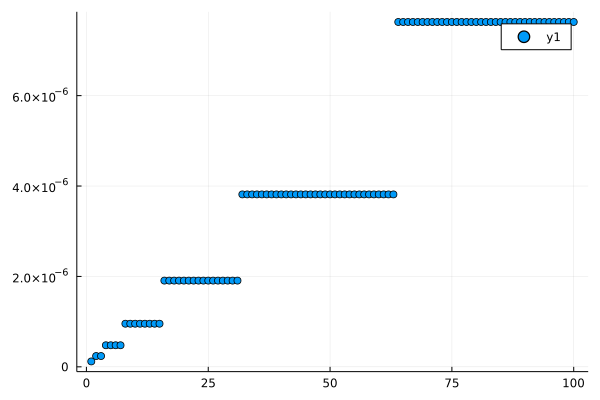

In [3]:

using Plots
array = Float32[]
r = 1:100
for i = r
    push!(array, eps(Float32(i)))
    
end
scatter(1:1:100, array)

# ex.3

```C
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

int
main (void)
{
    float f = 1.0f;

    for(int i = 1;i<=127;i++){
        f = f/2.0;
        printf (" f="); gsl_ieee_printf_float(&f);
        printf ("\n");
    }

    return 0;
}
```

![ss](https://drive.google.com/uc?export=view&id=1dGesr0XzAaZkN1NVotlo9b33ZedLcgxf)
![ss](https://drive.google.com/uc?export=view&id=1lMwasI5iKSUqE7j1Tn5MCDFmjBMWzmlE)


# ex.4

Algorytmem niestabilnym numerycznie jest aproksymacja wartości funkcji $e^{x}$ używając szeregu Maclaurina:\
$e^{x} = \sum_{n = 0}^{\infty} \frac{x^{n}}{n!} = 1 + x + \frac{x^{2}}{2!} + \frac{x^{3}}{3!} + ...$ \
Niestabilność algorytmu jest widoczna, gdy będziemy próbować obliczyć wartość funkcji dla x ujemnego.\
Weźmy na przykład x = - 5.5 i wykonajmy obliczenia dla 25 wyrazów szeregu.

In [1]:
function count_ex1(n,x)
    local result::Float16 = 0
    for i=0:n
        result += x^i / factorial(big(i))
        println(x^i / factorial(big(i)))
    end
    return result
end
function count_ex2(n,x)
    local result::Float16 = 0
    for i=0:n
        result += x^i / factorial(big(i))
    end
    return result
end

count_ex2 (generic function with 1 method)

In [2]:
x = -5.5
result_f = count_ex1(25,x)
result_r = exp(x)
println()
println("Aproksymacja poprzez funkcję: ",result_f)
println("Prawdziwa wartość: ",result_r)
println("Różnica wartości: ",abs(result_r-result_f))
println("Błąd względny: ",(abs(result_f - result_r))/exp(x)," %")

1.0
-5.5
15.125
-27.72916666666666666666666666666666666666666666666666666666666666666666666666657
38.12760416666666666666666666666666666666666666666666666666666666666666666666685
-41.94036458333333333333333333333333333333333333333333333333333333333333333333337
38.44533420138888888888888888888888888888888888888888888888888888888888888888888
-30.20704830109126984126984126984126984126984126984126984126984126984126984126983
20.76734570700024801587301587301587301587301587301587301587301587301587301587292
-12.69115570983348489858906525573192239858906525573192239858906525573192239858909
6.98013564040841669422398589065255731922398589065255731922398589065255731922399
-3.490067820204208347111992945326278659611992945326278659611992945326278659611995
1.599614417593595492426330099941211052322163433274544385655496766607877718988825
-0.6767599459049827083342165807443585221362999140776918554696332474110251888029679
0.2658699787483860639884422281495694194106892519590932289344987757686170384583076
-0.09

Błąd względny wynosi 0.7% co wskazuje na znaczącą różnicę pomiędzy wartością prawdziwą, a aproksymowaną przez szereg Maclaruina.\
Przyczyną błędu obliczeń jest *catastrophic cancellation* , czyli odejmowanie bliskich liczb, którego wynikiem jest mała liczba.\
Ta liczba jest normalizowana, mantysę przesuwamy w lewo, a pojawiające się miejsca po prawej stronie zapełniane są zerami lub przypadkowymi wartościami.\
Aby nasz algorytm stał się algorytmem stabilnym należy zastosować przekształcenie (dla ujemnych x):\
$e^{-x} = \frac{1}{e^{x}}$ \
Dzięki takiemu przekształceniu pozbędziemy się powodującego błędy odejmowania:\
$e^{-x} = \frac{1}{e^{x}} = \frac{1}{1 + x + \frac{x^{2}}{2!} + \frac{x^{3}}{3!} + ...}$ \
Dla wcześniej liczonego x = - 5.5 otrzymujemy:\
$e^{-5.5} = \frac{1}{1 + 5.5 + 15.125 + 27.729 + 38.128 + ...}$

In [3]:
x = -5.5
result_f = 1/count_ex2(25,abs(x))
result_r = exp(x)
println("Aproksymacja poprzez funkcję: ",result_f)
println("Prawdziwa wartość: ",result_r)
println("Różnica wartości: ",abs(result_r-result_f))
println("Błąd względny: ",(abs(result_f - result_r))/exp(x)," %")

Aproksymacja poprzez funkcję: 0.004086
Prawdziwa wartość: 0.004086771438464067
Różnica wartości: 1.230666979691597e-6
Błąd względny: 0.000301134281234509 %


Przekształcając nasz algorytm aproksymacja różni się od prawdziwej wartości o liczbę rzędu $10^{-6}$ , gdzie wcześniej było to $10^{-3}$.\
Błąd względny zmalał z 0.7% do 0.0003%.\
Powyższe wartości świadczą o znaczącej poprawie dokładności algorytmu.